# Download latest sky images from Sage nodes

In [44]:
import sage_data_client
import os
import urllib
import cv2
import matplotlib.pyplot as plt

ToDo: check for already downloaded files to avoid repeat downloads.

`sage_data_client` has several options to recovere data. Check [this notebook](https://github.com/sagecontinuum/sage-data-client/blob/main/examples/plotting_example.ipynb) and [this repo](https://github.com/sagecontinuum/sage-data-client) for more update.

In [67]:
data_dir = '/Users/bhupendra/data/test-img/'
node = "W021"

#### Get the dataframe containing image metadata

In [68]:
df = sage_data_client.query(
    start="-1h",
    filter={
        "plugin": "registry.sagecontinuum.org/theone/imagesampler:0.3.0",
        "vsn": node
    }
)
df

,timestamp,name,value,meta.filename,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn
0,2022-12-16 16:00:46.442442470+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,imagesampler-bottom,000048b02d15bc77,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-bottom,W021
1,2022-12-16 16:02:10.139738538+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,imagesampler-bottom,000048b02d15bc77,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-bottom,W021
2,2022-12-16 16:00:35.739671407+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3064b.ws-rpi,imagesampler-top,000048b02d15bc77,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W021


In [69]:
df=df.loc[df['meta.job']=='imagesampler-top']
df

,timestamp,name,value,meta.filename,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn
2,2022-12-16 16:00:35.739671407+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,0000dca632a3064b.ws-rpi,imagesampler-top,000048b02d15bc77,registry.sagecontinuum.org/theone/imagesampler...,imagesampler-top,W021


#### Extract the required urls

In [70]:

targets = []
times = []
for i in range(len(df)):
    if 'jpg' in df.iloc[i].value:
        targets.append(df.iloc[i].value)
        times.append(df.iloc[i].timestamp)

targets 
        


['https://storage.sagecontinuum.org/api/v1/data/imagesampler-top/sage-imagesampler-top-0.3.0/000048b02d15bc77/1671206435739671407-sample.jpg']

#### Download using urllib

In [71]:

for i in range(len(times)): 
    #print(times[i])
    link = targets[i]
    fname = link.split('-')[-1]
    filename = os.path.join(data_dir,times[i].strftime(node+'_top_cam_%Y%m%d-%H%M%S_'+fname))
    print(filename)
    urllib.request.urlretrieve(link, filename)


/Users/bhupendra/data/test-img/W021_top_cam_20221216-160035_sample.jpg


## Plot

- Convert BGR to RGB before plotting with MPL 

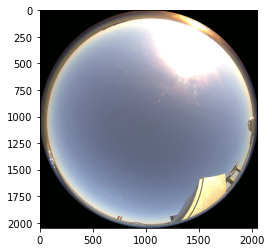

In [72]:
img_bgr = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)